# An attempt to use the large datasets from lichess
Download a dataset from https://database.lichess.org/ and place it in the same directory as this notebook.

In [1]:
import pandas as pd
import chess.pgn
import time
import chess.svg
from tqdm import tqdm
import matplotlib.pyplot as plt

# name of dataset
# pgn = open("lichess_db_standard_rated_2014-01.pgn")

In [ ]:
# empty list to store data
blackelo = []
whiteelo = []
results = []
openings = []
ecos = []


In [ ]:
for i in tqdm(range(100000)):
    game = chess.pgn.read_game(pgn)
    try:
        black = int(game.headers["BlackElo"])
        white = int(game.headers["WhiteElo"])
        opening = game.headers["Opening"]
        result = (game.headers["Result"])
        eco = (game.headers["ECO"])
        
        blackelo.append(black)
        whiteelo.append(white)
        openings.append(opening)
        results.append(result)
        ecos.append(eco)
    except:  
        continue
        

pgn.close()

In [ ]:
test = pd.DataFrame({"White Elo": whiteelo, "Black Elo": blackelo, "Result": results, 
                     "Opening": openings, "ECO": ecos})

In [ ]:
# convert results string to a single interger score
white_wins = []
translate = {'0-1': -1, '1-0':1, '1/2-1/2':0}
for i in results:
    white_wins.append(translate[i])
test["White Score"] = white_wins

In [2]:
# load a prexisting csv
test = pd.read_csv("lichess_2015.csv")

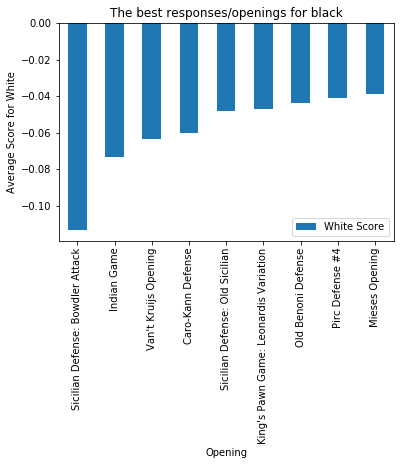

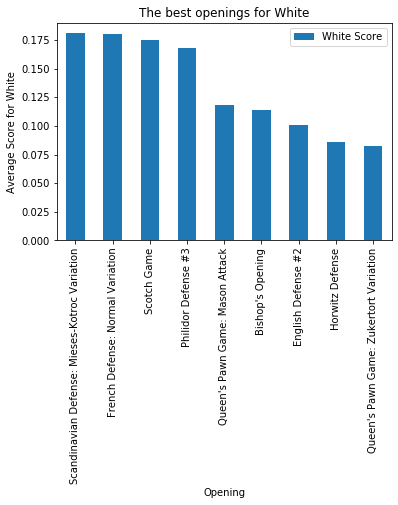

In [5]:
# Group by openings, calculate average score. Filter by popular openings.

opening_df = test.groupby(["Opening"])
opening_results = pd.DataFrame(opening_df["White Score"].mean())
opening_count = opening_df["Result"].count()
opening_results["Times Played"] = opening_count
filtered_openings = opening_results.loc[opening_results["Times Played"] > 10000]
openings_sorted_black = filtered_openings.iloc[1:,:].sort_values("White Score", ascending=True)
openings_sorted_white = filtered_openings.iloc[:,:].sort_values("White Score", ascending=False)

openings_sorted_black.iloc[1:10,:].plot(kind="bar", y="White Score")
plt.ylabel("Average Score for White")
plt.title("The best responses/openings for black")
plt.savefig("openings_black.png", bbox_inches = "tight")
plt.show()

openings_sorted_white.iloc[1:10,:].plot(kind="bar", y="White Score")
plt.ylabel("Average Score for White")
plt.title("The best openings for White")
plt.savefig("openings_white.png", bbox_inches = "tight")
plt.show()

# perhaps when checking for score, accumulate percentage win vs loss. in each column
# format strings by the colon
#filtered_openings.plot(kind="bar")